# Op Amp circuits {#sec-Op_Amp_circuits}
<!--
## Abstract {.unnumbered}
Some typical Op Amp circuits are presented to explore the use of the Op Amp element type using sumbolic MNA. These examples represent some very common applications of Op Amps ranging from a buffer amplifier to a dual Op Amp active band pass filter. 
-->

## Introduction
Some typical Op Amp circuits are presented to explore the use of the Op Amp element type using symbolic MNA. These examples represent some very common applications of Op Amps ranging from a buffer amplifier to a dual Op Amp active band pass filter. The following Op Amp circuits are analyzed below.

- Voltage follower
- Non-inverting amplifier
- Inverting amplifier
- Differential amplifier
- Summing amplifier
- Integrator
- Differentiator
- Generalized Impedance Converter
- Generalized Impedance Converter Filter
- Dual amplifier band pass filter

Two good Op Amp references are @Stout1976 and @Franco2002.

::: {.callout-note}  
The Op Amp integrator, Generalized Impedance Converter Filter and Dual amplifier band pass filter have non-resistive elements in the Op Amp feedback path. As shown below, the MNA Op Amp model gives correct results. Nevertheless, care should be taken when using the MNA Op Amp model.  
:::

The following Python libraries are used:

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Voltage follower
![Op Amp voltage follower](Voltage-follower.png){#fig-voltage-follower width=500}  

The Op Amp configured as a voltage follower is shown above. In this configuration, the output of the output Op Amp is connected to the negative input of the Op Amp. This causes the output voltage to be equal to the input voltage and this arrangement is called a voltage follower because the output voltage follows the input voltage. In this configuration, the Op Amp is used to as buffer amplifier or isolation amplifier since the amplifier provids a high input impedance and a low out put impedance. The gain of the amplifier is one. The circuit contains just one component, the Op Amp. 

In a real Op Amp, the input terminals are a differential inputs, and a signal fed to the inverting input will cause the output signal to swing in the oposit direction. When the output is connected to the inverting input by a direct connection (a wire), the voltage at the inverting input is equal to the voltage at the out put. Since a change in voltage at the inverting input will casue the output to move in the opposit direction, the contribution of the inverting input signal to the output of the Op Amp is cancelled. A signal on the non-inverting input will cause the output signal to move in the same direction. Since the Op Amp amplifies the difference between the input terminals, an Op Amp connected as shown in @fig-voltage-follower, will produce an output that is equal to the signal at the non-inverting input.  

The Op Amp model used in the MNA network equations, is defined to equate the inverting and non-inverting termainals to each other. This equality is defined in the network equations reguardless of anyother connections in the circuit. This implies that the Op Amp is only operating in a negative feedback mode. The output therminal of the Op Amp is assigned in the network equations as an unknown current. Since the Op Amp's input terminals are equal (by definition) and the output is connected to the inverting input, the output voltage is the same as the voltage at the non-inverting input. In the Op Amp model used in the MNA network equations, there is no distintion between the non-inverting and inverting inputs, other than node number and an arbitrary convention of treating the first node in the Op Amp netlist line as the positive node. This means that as described by the MNA network equations, the Op Amp's inputs can be swapped without affecting the solution. This is not the case with real Op Amps, so good practice is draw the circuit schematic with the Op Amp's input terminals going to the intended nodes.  

The netlist for @fig-voltage-follower was obtained from LTSpice:

```
V1 1 0 1
XU1 2 1 2
```
The reference designaltor for the Op Amp was changed from XU1 to O1 and the text was assinged to the net_list variable.

In [2]:
net_list = '''
V1 1 0 1
O1 2 1 2 
'''

Generate and display the network equations.

In [3]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# generate markdown text to display the network equations.
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} = 0$<br>$I_{O1} = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{2} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [4]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [5]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$I_{V1} = 0$<br>$I_{O1} = 0$<br>$v_{1} = V_{1}$<br>$v_{2} = V_{1}$<br>

The voltage at node 2 is simply equal to the input voltage, $v_2 = V_1$.

## Non-inverting amplifier
![Non-inverting amplifier configuration.](non-inverting-amp.png){#fig-non-inverting-amp}  

The schematic for a non-inverting Op Amp configuration is shown above. Resistors Rf and R1 form a voltage divider circuit from the Op Amp out put terminal to the inverting input termial at node 4. Resistor Rp is some times included in Op Amp circuits as an impedance maching element that matches the source impedance from the driving circuit, Rs. Rp and Rs are usually equal in value and serve to balance the impedance seen at each of the input terminals. In a real Op Amp a very small amount of leakage current and a very small offest voltage is present at the input pins.  

The schematic for the circuit was entered into LTSpice and the netlist was generated.
```
V1 1 0 1
XU1 4 3 2 opamp Aol=100K GBW=10Meg
Rs 3 1 100
R1 0 5 2k
Rf 2 5 2k
Rp 4 5 100
```
As shown below, some edits were made to the netlist.

In [6]:
net_list = '''
V1 1 0 1
O1 4 3 2 
Rs 3 1 100
R1 0 5 2e3
Rf 2 5 2e3
Rp 4 5 100
'''

Generate and display the network equations.

In [7]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# generate markdown text to display the network equations.
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{Rs} - \frac{v_{3}}{Rs} = 0$<br>$I_{O1} + \frac{v_{2}}{Rf} - \frac{v_{5}}{Rf} = 0$<br>$- \frac{v_{1}}{Rs} + \frac{v_{3}}{Rs} = 0$<br>$\frac{v_{4}}{Rp} - \frac{v_{5}}{Rp} = 0$<br>$v_{5} \cdot \left(\frac{1}{Rp} + \frac{1}{Rf} + \frac{1}{R_{1}}\right) - \frac{v_{4}}{Rp} - \frac{v_{2}}{Rf} = 0$<br>$v_{1} = V_{1}$<br>$- v_{3} + v_{4} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [8]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [9]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{R_{1} V_{1} + Rf V_{1}}{R_{1}}$<br>$v_{3} = V_{1}$<br>$v_{4} = V_{1}$<br>$v_{5} = V_{1}$<br>$I_{V1} = 0$<br>$I_{O1} = - \frac{V_{1}}{R_{1}}$<br>

Solving for the transfer function at node 2.

In [10]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.expand()

From the transfer function we can see that the voltage gain of non-inverting Op Amp configuration is always greater than one.

## Inverting amplifier
![Inverting amplifier configuration.](inverting-amp.png){#fig-inverting-amp}  

The schematic above shows a the typical connection for an inverting amplifier. This configuratin is called an inverting amplifier since the output signal is inverted with respect to the input signal. Resistors Rf and R1 set the gain of the amplifier. Resistor Rp is sometime used to balance the impedance as seen from the Op Amps two inputs. Usually the value of Rp is chosen to be equal to the paralled combination of R1 and Rf.

The schematic for the circuit was entered into LTSpice and the following netlist was generated.
```
V1 1 0 1
XU1 3 4 2 opamp Aol=100K GBW=10Meg
R1 3 1 2k
Rp 0 4 1k
Rf 3 2 2k
```
A few edits were made to the netlist.

In [11]:
net_list = '''
V1 1 0 1
O1 3 4 2 
R1 3 1 2e3
Rp 0 4 1e3
Rf 3 2 2e3
'''

Generate the network equations.

In [12]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# generate markdown text to display the network equations.
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}} = 0$<br>$I_{O1} + \frac{v_{2}}{Rf} - \frac{v_{3}}{Rf} = 0$<br>$v_{3} \cdot \left(\frac{1}{Rf} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{Rf} - \frac{v_{1}}{R_{1}} = 0$<br>$\frac{v_{4}}{Rp} = 0$<br>$v_{1} = V_{1}$<br>$v_{3} - v_{4} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [13]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [14]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = - \frac{Rf V_{1}}{R_{1}}$<br>$v_{3} = 0$<br>$v_{4} = 0$<br>$I_{V1} = - \frac{V_{1}}{R_{1}}$<br>$I_{O1} = \frac{V_{1}}{R_{1}}$<br>

Solving for the transfer function at node 2.

In [15]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.simplify()

## Differential amplifier
![Differential amplifier configuration.](differential-amp.png){#fig-differential-amp}  

The circuit shown above is a differential amplifier, where the circuit outputs the difference between V1 and V2, while rejecting any voltage from V3. All the resistors in @fig-differential-amp have been set a value of 1k, whcih makes the gain applied to V1 and V2 equal to one, but the values of the reistors don't have to be equal, which would make the gains something else. 

The schematic for the circuit was entered into LTSpice and the following netlist was exported:
```
XU1 4 5 2 opamp Aol=100K GBW=10Meg
V1 1 6 1
R1 4 1 1k
R3 2 4 1k
R4 0 5 1k
R2 5 3 1k
V2 3 6 3
V3 6 0 10
```
A few edits to the netlist were made to change the Op Amp designation and the values of the resistors to scientific notation.

In [16]:
net_list = '''
O1 4 5 2
V1 1 6 1
R1 4 1 1e3
R3 2 4 1e3
R4 0 5 1e3
R2 5 3 1e3
V2 3 6 3
V3 6 0 100
'''

Generate and display the network equations.

In [17]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# generate markdown text to display the network equations.
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{4}}{R_{1}} = 0$<br>$I_{O1} + \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{3}} = 0$<br>$I_{V2} + \frac{v_{3}}{R_{2}} - \frac{v_{5}}{R_{2}} = 0$<br>$v_{4} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{1}}{R_{1}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{2}} = 0$<br>$- I_{V1} - I_{V2} + I_{V3} = 0$<br>$v_{1} - v_{6} = V_{1}$<br>$v_{3} - v_{6} = V_{2}$<br>$v_{6} = V_{3}$<br>$v_{4} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [18]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [19]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1} + V_{3}$<br>$v_{2} = \frac{R_{1} R_{4} V_{2} + R_{1} R_{4} V_{3} - R_{2} R_{3} V_{1} - R_{2} R_{3} V_{3} - R_{3} R_{4} V_{1} + R_{3} R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>$v_{3} = V_{2} + V_{3}$<br>$v_{4} = \frac{R_{4} V_{2} + R_{4} V_{3}}{R_{2} + R_{4}}$<br>$v_{5} = \frac{R_{4} V_{2} + R_{4} V_{3}}{R_{2} + R_{4}}$<br>$v_{6} = V_{3}$<br>$I_{V1} = \frac{- R_{2} V_{1} - R_{2} V_{3} - R_{4} V_{1} + R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>$I_{V2} = \frac{- V_{2} - V_{3}}{R_{2} + R_{4}}$<br>$I_{V3} = \frac{- R_{1} V_{2} - R_{1} V_{3} - R_{2} V_{1} - R_{2} V_{3} - R_{4} V_{1} + R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>$I_{O1} = \frac{R_{2} V_{1} + R_{2} V_{3} + R_{4} V_{1} - R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>

In [20]:
U_sym[v2]

In [21]:
U_sym[v2].subs({R1:1e3,R2:1e3,R3:1e3,R4:1e3})

When equal values are put in for the resistors, the output voltage reduces to the difference between the input voltages.

## Summing amplifier
![summing amplifier circuit](summing_amplifier.png){#fig-summing_amplifier}

A summing amplifier outputs a voltage that is the sum of the input voltages. The schematic shown in @fig-summing_amplifier has two input voltages, V1 and V2. Feedback provide by Rf along with R1 sets the gain of the amplifier. An abritray number of input can be configuted by duplicating V1 and R2 and connecting to node number 5. 

There are other Op Amp summing configurations that have an inverting configuration. 

```
XU1 4 5 2 opamp Aol=100K GBW=10Meg
V1 1 0 1
R1 4 0 1k
Rf 2 4 2k
R4 0 5 1k
R3 5 3 1k
V2 3 0 3
R2 5 1 1k
```

In [22]:
net_list = '''
O1 4 5 2
V1 1 0 1
R1 4 0 1e3
Rf 2 4 2e3
R4 0 5 1e3
R3 5 3 1e3
V2 3 0 3
R2 5 1 1e3
'''

Generate the network equations.

In [23]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [24]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{2}} - \frac{v_{5}}{R_{2}} = 0$<br>$I_{O1} + \frac{v_{2}}{Rf} - \frac{v_{4}}{Rf} = 0$<br>$I_{V2} + \frac{v_{3}}{R_{3}} - \frac{v_{5}}{R_{3}} = 0$<br>$v_{4} \cdot \left(\frac{1}{Rf} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{Rf} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{3}} - \frac{v_{1}}{R_{2}} = 0$<br>$v_{1} = V_{1}$<br>$v_{3} = V_{2}$<br>$v_{4} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [25]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [26]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{R_{1} R_{2} R_{4} V_{2} + R_{1} R_{3} R_{4} V_{1} + R_{2} R_{4} Rf V_{2} + R_{3} R_{4} Rf V_{1}}{R_{1} R_{2} R_{3} + R_{1} R_{2} R_{4} + R_{1} R_{3} R_{4}}$<br>$v_{3} = V_{2}$<br>$v_{4} = \frac{R_{2} R_{4} V_{2} + R_{3} R_{4} V_{1}}{R_{2} R_{3} + R_{2} R_{4} + R_{3} R_{4}}$<br>$v_{5} = \frac{R_{2} R_{4} V_{2} + R_{3} R_{4} V_{1}}{R_{2} R_{3} + R_{2} R_{4} + R_{3} R_{4}}$<br>$I_{V1} = \frac{- R_{3} V_{1} - R_{4} V_{1} + R_{4} V_{2}}{R_{2} R_{3} + R_{2} R_{4} + R_{3} R_{4}}$<br>$I_{V2} = \frac{- R_{2} V_{2} + R_{4} V_{1} - R_{4} V_{2}}{R_{2} R_{3} + R_{2} R_{4} + R_{3} R_{4}}$<br>$I_{O1} = \frac{- R_{2} R_{4} V_{2} - R_{3} R_{4} V_{1}}{R_{1} R_{2} R_{3} + R_{1} R_{2} R_{4} + R_{1} R_{3} R_{4}}$<br>

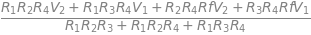

In [27]:
U_sym[v2]

In [28]:
U_sym[v2].subs({R1:1e3,R2:1e3,R3:1e3,R4:1e3,Rf:2e3})

When all the resistor values are equal, except for $R_f$ which is set to twice the value, the gain of the circuit is unity and the output voltage is the sum of $V_1$ and $V_2$, as shown above. 

## Integrator
![Integrator circuit](integrator.png){#fig-integrator}

The schematic of the circuit shown above is an example of an [Op Amp integrator](https://en.wikipedia.org/wiki/Op_amp_integrator) and produces an output voltage which is proportional to the negative of the integral of the input voltage. The circuit is from @Stout1976, Chapter 15, Figure 15.3, with the switches omited, which are used to reset the integrator. The current through R1 and Cf is almost the same, since the current in Rf is small. Rf sets the low frequency gain of the circuit and prevents saturation of the Op Amp. The resistors R2 and Rp balance any offset voltages and currents at the input terminals of the Op Amp. The capacitor Cp is used to by pass any thermal noise from Rp.

The intergrator circuit is essentially a low pass filter and acts as an integrator for most of the frequency range up to the pole set by the values of R1 and Cf. The rule of thumb is to choose a time constant, $\tau = R_1 C_f$, such that $\tau$ is larger than the period of the input signal, but much smaller than the duration of interest for integration.

The schematic for the integrator was entered into LTSpice and the netlist was was obtained. In the LTSpice simulation, the voltage source, V1, was configured as pulse voltage source inorder to test the circuit. For the symbolic analysis, V1 is defined as a voltage source.   

```
V1 1 0 PULSE(0 1 1m 2m 0 0 5m) AC 1
XU1 4 5 2 opamp Aol=100K GBW=10Meg
R1 3 1 1k
R2 4 3 100
Rp 0 5 100
Rf 3 2 100k
Cf 2 3 1µ
Cp 5 0 0.1µ
```
A few edits were made and the netlist is assigned to the net_list variable.

In [178]:
net_list = '''
V1 1 0 1
OU1 4 5 2
R1 3 1 1e3
R2 4 3 100
Rp 0 5 100
Rf 3 2 100e3
Cf 2 3 1e-6
Cp 5 0 0.1e-6
'''

Generate the network equations.

In [179]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [180]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}} = 0$<br>$I_{Ou1} + v_{2} \left(Cf s + \frac{1}{Rf}\right) + v_{3} \left(- Cf s - \frac{1}{Rf}\right) = 0$<br>$v_{2} \left(- Cf s - \frac{1}{Rf}\right) + v_{3} \left(Cf s + \frac{1}{Rf} + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$- \frac{v_{3}}{R_{2}} + \frac{v_{4}}{R_{2}} = 0$<br>$v_{5} \left(Cp s + \frac{1}{Rp}\right) = 0$<br>$v_{1} = V_{1}$<br>$v_{4} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [181]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve and display the equations.

In [182]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = - \frac{Rf V_{1}}{Cf R_{1} Rf s + R_{1}}$<br>$v_{3} = 0$<br>$v_{4} = 0$<br>$v_{5} = 0$<br>$I_{V1} = - \frac{V_{1}}{R_{1}}$<br>$I_{Ou1} = \frac{V_{1}}{R_{1}}$<br>

Solving for the transfer function at node 2. Transfer functions are normally presented in the frequency domain and are steady state responses.

In [183]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.simplify()

In [184]:
element_values = SymMNA.get_part_values(network_df)
element_values

{Cf: 1e-06, Cp: 1e-07, Ou₁: nan, R₁: 1000.0, R₂: 100.0, Rf: 100000.0, Rp: 100.
0, V₁: 1.0}

In the circuit, the values of R1 and Cf produce a time constant calculated below.

In [185]:
print('integrator time constant: {:.1f}ms'.format(element_values[R1]*element_values[Cf]*1e3))

integrator time constant: 1.0ms


This means the integrator circuit will produce reasonable results for input signals having frequencies of less than 5 Hz over an integration period of less than 10 ms.

Substiuting the element values into the network equations gives the following equations.

In [186]:
NE = NE_sym.subs(element_values)
NE

⎡                      I_V1 + 0.001⋅v₁ - 0.001⋅v₃                       ⎤   ⎡ 
⎢                                                                       ⎥   ⎢ 
⎢       I_Ou1 + v₂⋅(1.0e-6⋅s + 1.0e-5) + v₃⋅(-1.0e-6⋅s - 1.0e-5)        ⎥   ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢-0.001⋅v₁ + v₂⋅(-1.0e-6⋅s - 1.0e-5) + v₃⋅(1.0e-6⋅s + 0.01101) - 0.01⋅v₄⎥   ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢                          -0.01⋅v₃ + 0.01⋅v₄                           ⎥ = ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢                         v₅⋅(1.0e-7⋅s + 0.01)                          ⎥   ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢                                  v₁                                   ⎥   ⎢1
⎢                                                                       ⎥   ⎢ 
⎣                                v₄ - v₅            

Solving for the unknow node voltages and source currents.

In [187]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = - \frac{1000.0}{s + 10.0}$<br>$v_{3} = 0.0$<br>$v_{4} = 0.0$<br>$v_{5} = 0.0$<br>$I_{V1} = -0.001$<br>$I_{Ou1} = 0.001$<br>

The voltage transferfunction of the integrator is shown below.

In [188]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

Convert transfer function to SciPy system. Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [189]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [190]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easly be obtained with the following code:

In [191]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the preamp transfer function are plotted.

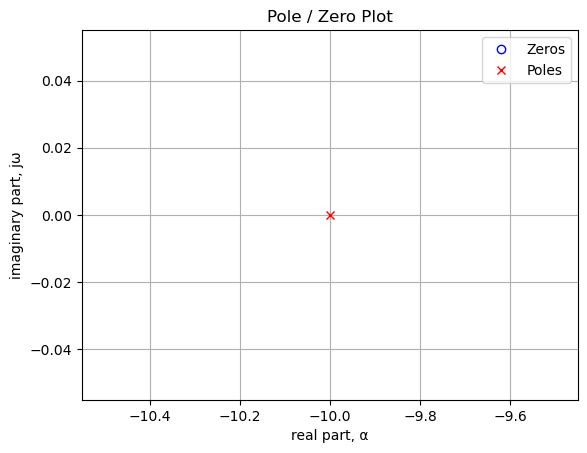

In [192]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [193]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 0


In [194]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 1
-1.59 Hz


Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the intrgrator circuit. 

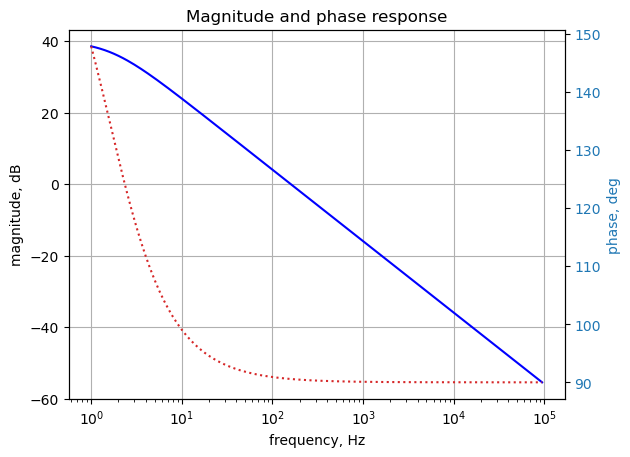

In [195]:
x = np.logspace(0, 5, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

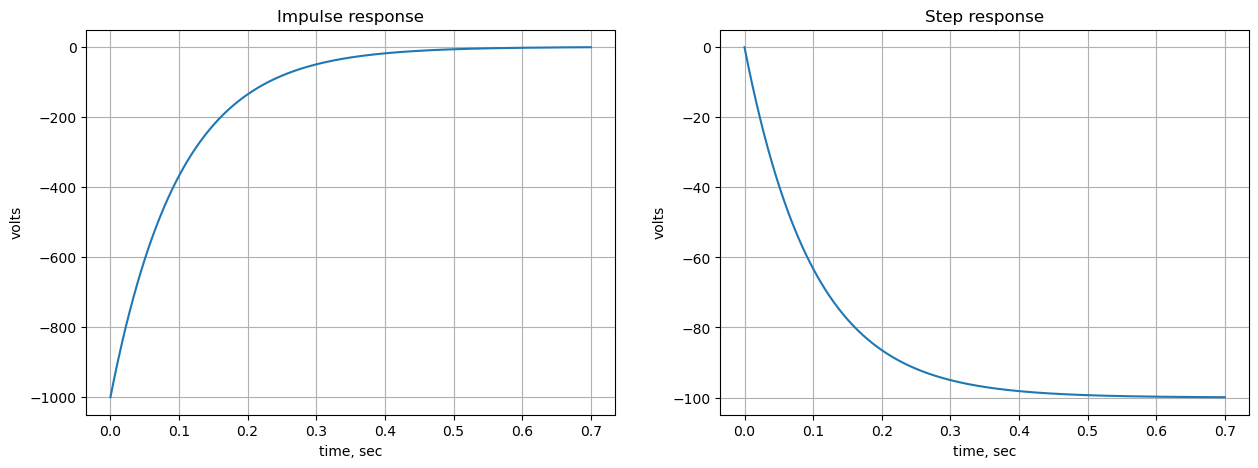

In [196]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()

# show plot
plt.show()

The step responce for the integrator circuit is an exponential function, but over the initial time segment of zero to about 10ms, the response is approximately a straight line and value at point is equal to the area under the step at each point in time.

** Ramp input to integrator**  
The following cells step through the calcuations to solve for the voltage at node 2. The following cells analyze the circuit with a voltage ramp as the input. The Laplace transform of a ramp is $\frac {a}{s^2}$, where a is the slope of the ramp.

In [197]:
element_values[V1] = 500/(s**2)
NE = NE_sym.subs(element_values)
NE

                                                                            ⎡ 
                                                                            ⎢ 
⎡                      I_V1 + 0.001⋅v₁ - 0.001⋅v₃                       ⎤   ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢       I_Ou1 + v₂⋅(1.0e-6⋅s + 1.0e-5) + v₃⋅(-1.0e-6⋅s - 1.0e-5)        ⎥   ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢-0.001⋅v₁ + v₂⋅(-1.0e-6⋅s - 1.0e-5) + v₃⋅(1.0e-6⋅s + 0.01101) - 0.01⋅v₄⎥   ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢                          -0.01⋅v₃ + 0.01⋅v₄                           ⎥ = ⎢ 
⎢                                                                       ⎥   ⎢ 
⎢                         v₅⋅(1.0e-7⋅s + 0.01)                          ⎥   ⎢5
⎢                                                                       ⎥   ⎢─
⎢                                  v₁               

Solve the equations and display the results.

In [198]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{500.0}{s^{2}}$<br>$v_{2} = - \frac{500000.0}{s^{3} + 10.0 s^{2}}$<br>$v_{3} = 0.0$<br>$v_{4} = 0.0$<br>$v_{5} = 0.0$<br>$I_{V1} = - \frac{0.5}{s^{2}}$<br>$I_{Ou1} = \frac{0.5}{s^{2}}$<br>

Declare the variable t for time.

In [199]:
t = symbols('t',positive=True)  # t > 0

The voltage at node 1 is a ramp and the inverse Laplace transform of the ramp is calculated below.

In [200]:
V1_volts = inverse_laplace_transform(U[v1], s, t)
V1_volts

The voltage at node 2 is:

In [201]:
node_v2_s = U[v2] #.nsimplify().simplify().expand().together()
node_v2_s

The inverse Laplace was taking too long, so the lines of code were commented out

In [202]:
node_v2 = inverse_laplace_transform(node_v2_s, s, t)
node_v2

In [203]:
# the x-axis is time and voltages are plotted from 0 to 0.001 seconds over 200 points 
x = np.linspace(0, 0.002, 200, endpoint=True)

# the voltage at note 2 is evaluated at each point in the array x
V_node2 = lambdify(t, node_v2)(x)

# the voltage at note 1 is evaluated at each point in the array x
V_node1 = lambdify(t, V1_volts)(x)

Plot the final combined result.

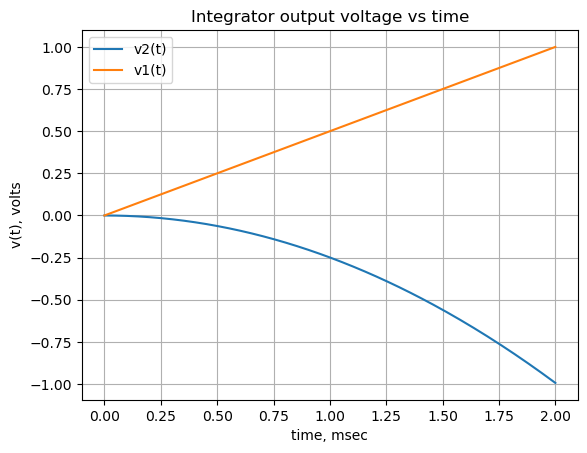

In [210]:
plt.title('Integrator output voltage vs time')

plt.plot(x*1e3, np.real(V_node2),label='v2(t)')
plt.plot(x*1e3, np.real(V_node1),label='v1(t)')
#plt.plot(x*1e3, np.real(V_node2)+V_node1*x/2/(element_values[R1]*element_values[Cf]),label='error')

plt.ylabel('v(t), volts')
plt.xlabel('time, msec')

plt.legend()
plt.grid()
plt.show()

The plot above shows that the output of the Op Amp integrator, v2, is an exponential function in response to a voltage ramp scaled by the values of $R_1$ and $C_f$. The value of v2 is the area under the ramp at each x.

## Differentiator
![Differentiator circuit.](differentiator.png){#fig-differentiator}  

@fig-differentiator implements a circuit which produces an output proporational to the derivative of the input voltage. The circuit is from @Stout1976, chapter 15, Fig 15.1. C1, Rf and the Op Amp implement the differentiator function. R1 and Cf help stabalized the feedback loop. Rp helps balance the Op Amps offset currents and Cp is used to bypass the thermal noise of Rp to ground. A more compresive description of the circuit can be found in the referenced hadbook.

The schamitic for the circuit was entered into LTSpice and the netlist was exported.

```
XU1 5 4 2 opamp Aol=100K GBW=10Meg
V1 1 0 PULSE(0 1 1m 1m 0.5m 1m 5m) AC 1
R1 3 1 100
Rf 2 5 200k
Rp 0 4 200k
C1 5 3 0.01µ
Cf 2 5 70p
Cp 0 4 0.1µ
```
The netlist was editited as shown below.

In [56]:
net_list = '''
O1 5 4 2
V1 1 0 1
R1 3 1 100
Rf 2 5 200e3
Rp 0 4 200e3
C1 5 3 0.01e-6
Cf 2 5 50e-12
Cp 0 4 0.1e-6
'''

Generate and display the network equations.

In [57]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# generate markdown text to display the network equations.
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \left(Cf s + \frac{1}{Rf}\right) + v_{5} \left(- Cf s - \frac{1}{Rf}\right) = 0$<br>$- C_{1} s v_{5} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}} = 0$<br>$v_{4} \left(Cp s + \frac{1}{Rp}\right) = 0$<br>$- C_{1} s v_{3} + v_{2} \left(- Cf s - \frac{1}{Rf}\right) + v_{5} \left(C_{1} s + Cf s + \frac{1}{Rf}\right) = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [58]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [59]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = - \frac{C_{1} Rf V_{1} s}{C_{1} Cf R_{1} Rf s^{2} + C_{1} R_{1} s + Cf Rf s + 1}$<br>$v_{3} = \frac{V_{1}}{C_{1} R_{1} s + 1}$<br>$v_{4} = 0$<br>$v_{5} = 0$<br>$I_{V1} = - \frac{C_{1} V_{1} s}{C_{1} R_{1} s + 1}$<br>$I_{O1} = \frac{C_{1} V_{1} s}{C_{1} R_{1} s + 1}$<br>

Solving for the transfer function at node 2.

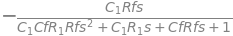

In [60]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.simplify()

Substituting values for the component reference designators.

In [61]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1e-08, Cf: 5e-11, Cp: 1e-07, O₁: nan, R₁: 100.0, Rf: 200000.0, Rp: 200000
.0, V₁: 1.0}

In [62]:
NE = NE_sym.subs(element_values)
NE

⎡                     I_V1 + 0.01⋅v₁ - 0.01⋅v₃                     ⎤   ⎡ 0 ⎤
⎢                                                                  ⎥   ⎢   ⎥
⎢    I_O1 + v₂⋅(5.0e-11⋅s + 5.0e-6) + v₅⋅(-5.0e-11⋅s - 5.0e-6)     ⎥   ⎢ 0 ⎥
⎢                                                                  ⎥   ⎢   ⎥
⎢          -1.0e-8⋅s⋅v₅ - 0.01⋅v₁ + v₃⋅(1.0e-8⋅s + 0.01)           ⎥   ⎢ 0 ⎥
⎢                                                                  ⎥   ⎢   ⎥
⎢                      v₄⋅(1.0e-7⋅s + 5.0e-6)                      ⎥ = ⎢ 0 ⎥
⎢                                                                  ⎥   ⎢   ⎥
⎢-1.0e-8⋅s⋅v₃ + v₂⋅(-5.0e-11⋅s - 5.0e-6) + v₅⋅(1.005e-8⋅s + 5.0e-6)⎥   ⎢ 0 ⎥
⎢                                                                  ⎥   ⎢   ⎥
⎢                                v₁                                ⎥   ⎢1.0⎥
⎢                                                                  ⎥   ⎢   ⎥
⎣                             -v₄ + v₅                             ⎦   ⎣ 0 ⎦

In [63]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = - \frac{200000000.0 s}{s^{2} + 1100000.0 s + 100000000000.0}$<br>$v_{3} = \frac{1000000.0}{s + 1000000.0}$<br>$v_{4} = 0.0$<br>$v_{5} = 0.0$<br>$I_{V1} = - \frac{s}{100.0 s + 100000000.0}$<br>$I_{O1} = \frac{s}{100.0 s + 100000000.0}$<br>

Transfer function:

In [64]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

Convert transfer function to SciPy system. Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [65]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [66]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easly be obtained with the following code:

In [67]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the preamp transfer function are plotted.

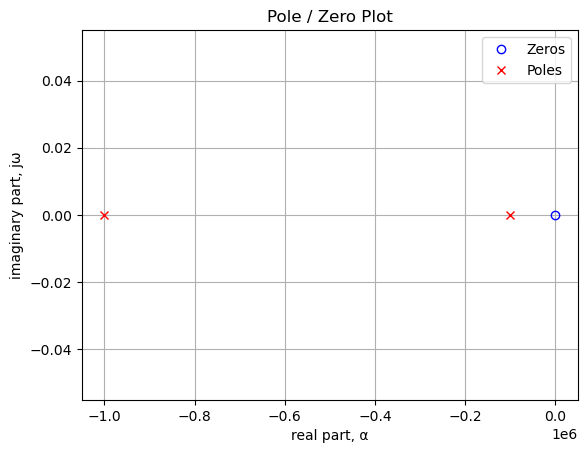

In [68]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [69]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [70]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 2
-159,154.94 Hz
-15,915.49 Hz


Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. 

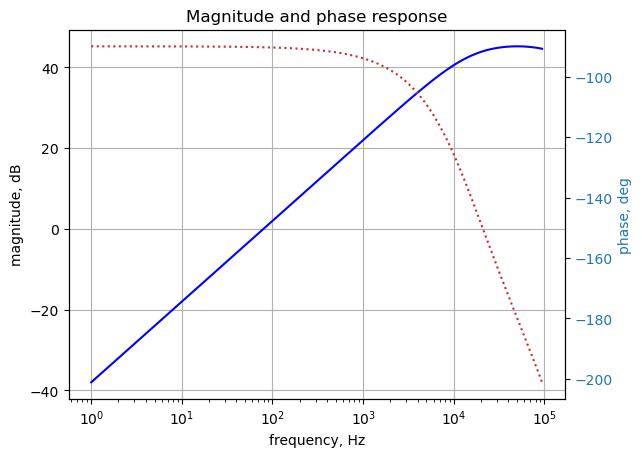

In [71]:
x = np.logspace(0, 5, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

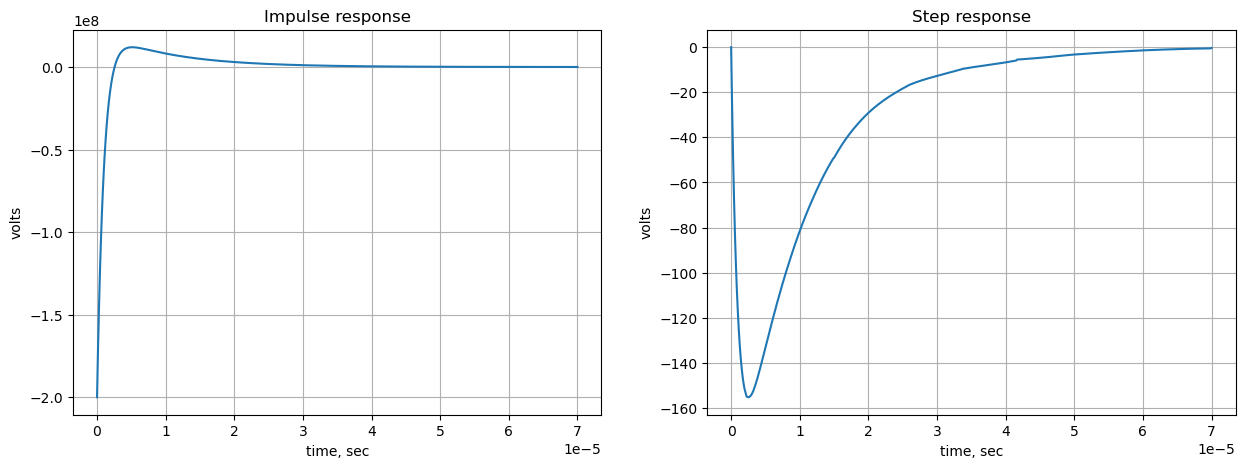

In [72]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()

# show plot
plt.show()

The impulse and step response maximum values are for an ideal Op Amp. A real Op Amp's maximum output voltage would be limited to the supply rails.

The following cells analyize the circuit with a voltage ramp as the input. The Laplace transform of a ramp is $\frac {a}{s^2}$, where a is the slope of the ramp.

In [73]:
element_values[V1] = 1e3/(s**2)   # ramp of 1 volt per 1 ms 
NE = NE_sym.subs(element_values)
NE

                                                                       ⎡  0   
                                                                       ⎢      
⎡                     I_V1 + 0.01⋅v₁ - 0.01⋅v₃                     ⎤   ⎢  0   
⎢                                                                  ⎥   ⎢      
⎢    I_O1 + v₂⋅(5.0e-11⋅s + 5.0e-6) + v₅⋅(-5.0e-11⋅s - 5.0e-6)     ⎥   ⎢  0   
⎢                                                                  ⎥   ⎢      
⎢          -1.0e-8⋅s⋅v₅ - 0.01⋅v₁ + v₃⋅(1.0e-8⋅s + 0.01)           ⎥   ⎢  0   
⎢                                                                  ⎥   ⎢      
⎢                      v₄⋅(1.0e-7⋅s + 5.0e-6)                      ⎥ = ⎢  0   
⎢                                                                  ⎥   ⎢      
⎢-1.0e-8⋅s⋅v₃ + v₂⋅(-5.0e-11⋅s - 5.0e-6) + v₅⋅(1.005e-8⋅s + 5.0e-6)⎥   ⎢1000.0
⎢                                                                  ⎥   ⎢──────
⎢                                v₁                 

Solve the equations and display the results.

In [74]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{1000.0}{s^{2}}$<br>$v_{2} = - \frac{200000000000.0}{s^{3} + 1100000.0 s^{2} + 100000000000.0 s}$<br>$v_{3} = \frac{1000000000.0}{s^{3} + 1000000.0 s^{2}}$<br>$v_{4} = 0.0$<br>$v_{5} = 0.0$<br>$I_{V1} = - \frac{10.0}{s^{2} + 1000000.0 s}$<br>$I_{O1} = \frac{10.0}{s^{2} + 1000000.0 s}$<br>

Declare the variable t for time.

In [75]:
t = symbols('t',positive=True)  # t > 0

The voltage at node 1 is a ramp and the inverse Laplace transform of the ramp is calculated below.

In [76]:
V1_volts = inverse_laplace_transform(U[v1], s, t)
V1_volts

The voltage at node 2 is:

In [77]:
node_v2_s = U[v2] #.nsimplify().simplify().expand().together()
node_v2_s

The inverse Laplace was taking too long, so the lines of code were commented out

In [78]:
node_v2 = inverse_laplace_transform(node_v2_s, s, t)
node_v2

In [79]:
# the x-axis is time and voltages are plotted from 0 to 0.001 seconds over 200 points 
x = np.linspace(0, 0.001, 200, endpoint=True)

# the voltage at note 2 is evaluated at each point in the array x
V_node2 = lambdify(t, node_v2)(x)

# the voltage at note 1 is evaluated at each point in the array x
V_node1 = lambdify(t, V1_volts)(x)

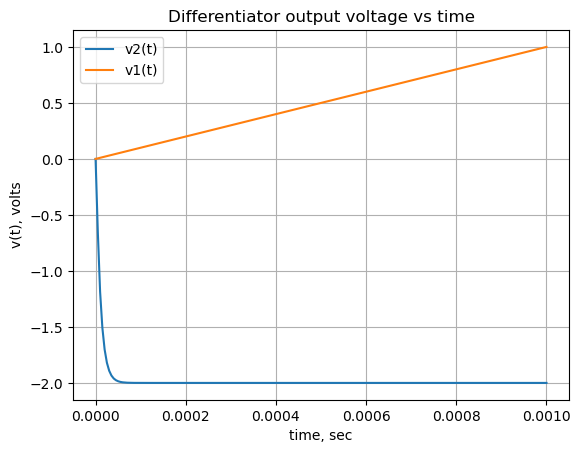

In [80]:
plt.title('Differentiator output voltage vs time')

plt.plot(x, np.real(V_node2),label='v2(t)')
plt.plot(x, np.real(V_node1),label='v1(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, sec')

plt.legend()
plt.grid()
plt.show()

The plot above shows that the output of the Op Amp differentiator, v2, is a constant value in response to a voltage ramp scaled by the values of $R_1$ and $C_f$. The value of v2 is the slope of the ramp at each x.

## Generalized Impedance Converter (GIC) circuit
![Schematic for a Generalized Impedance Converter circuit.](GIC-circuit.png){#fig-GIC-circuit}  

The schematic shown above is from @Williams1995, Figure 3-31, and is known as a generalized impedance converter (GIC). The circuit is attributed to @Antoniou1969 and used by @Bruton1978 to realize active filters from ladder topologies as describe in @sec-GIC-LP-filter.

The schematic for the circuit shown above was entered into LTSpice and the following net list was generated.
```
XU2 3 1 4 opamp Aol=100K GBW=10Meg
V1 1 0 1
XU1 3 5 2 opamp Aol=100K GBW=10Meg
R2 2 3 1
R4 4 5 1
R5 5 0 1
R1 1 2 1
R3 3 4 1
```

### Basic GIC
The circuit for the basic GIC is analyzed below using resistors in all the elements.

In [81]:
net_list = '''
O2 3 1 4 
V1 1 0 1
O1 3 5 2
R1 1 2 1
R2 2 3 1
R3 3 4 1
R4 4 5 1
R5 5 0 1
'''

In [82]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{2}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$v_{3} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{3}} - \frac{v_{2}}{R_{2}} = 0$<br>$I_{O2} + v_{4} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{4}} - \frac{v_{3}}{R_{3}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{4}}{R_{4}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{3} = 0$<br>$v_{3} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [83]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [84]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{- R_{2} R_{4} V_{1} + R_{3} R_{5} V_{1}}{R_{3} R_{5}}$<br>$v_{3} = V_{1}$<br>$v_{4} = \frac{R_{4} V_{1} + R_{5} V_{1}}{R_{5}}$<br>$v_{5} = V_{1}$<br>$I_{V1} = - \frac{R_{2} R_{4} V_{1}}{R_{1} R_{3} R_{5}}$<br>$I_{O2} = \frac{- R_{3} V_{1} - R_{4} V_{1}}{R_{3} R_{5}}$<br>$I_{O1} = \frac{R_{1} R_{4} V_{1} + R_{2} R_{4} V_{1}}{R_{1} R_{3} R_{5}}$<br>

Solving for the impedance at node 1.

In [85]:
Z_sym = U_sym[v1]/(U_sym[I_V1])
Z_sym

If you replace any of the R's with $Ls$ or $\frac {1}{Cs}$, then you can see that a new complex impedance is obtained. This is illustrated in the two examples below. 

### Inductor
By substituting a capacitor for R4, the impedance of a grounded inductor can be synthesized. 

In [86]:
# inductor
net_list = '''
O2 3 1 4 
V1 1 0 1
O1 3 5 2
R1 1 2 1
R2 2 3 1
R3 3 4 1
*R4 4 5 1
C 4 5 1
R5 5 0 1
'''

In [87]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{2}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$v_{3} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{3}} - \frac{v_{2}}{R_{2}} = 0$<br>$- C s v_{5} + I_{O2} + v_{4} \left(C s + \frac{1}{R_{3}}\right) - \frac{v_{3}}{R_{3}} = 0$<br>$- C s v_{4} + v_{5} \left(C s + \frac{1}{R_{5}}\right) = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{3} = 0$<br>$v_{3} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [88]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [89]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C R_{3} R_{5} V_{1} s - R_{2} V_{1}}{C R_{3} R_{5} s}$<br>$v_{3} = V_{1}$<br>$v_{4} = \frac{C R_{5} V_{1} s + V_{1}}{C R_{5} s}$<br>$v_{5} = V_{1}$<br>$I_{V1} = - \frac{R_{2} V_{1}}{C R_{1} R_{3} R_{5} s}$<br>$I_{O2} = \frac{- C R_{3} V_{1} s - V_{1}}{C R_{3} R_{5} s}$<br>$I_{O1} = \frac{R_{1} V_{1} + R_{2} V_{1}}{C R_{1} R_{3} R_{5} s}$<br>

Solving for the impedance at node 1.

In [90]:
Z_sym = U_sym[v1]/(U_sym[I_V1])
Z_sym #.simplify()

The sign of the impedance is negative which accounts for the direction of the current flowing in V1. 

The value of the synthesized inductor is:

$\frac {C R_1 R_3 R_5}{R_2}$

### D element - frequency dependent negative resistor
By substituting a capacitor for R1 and R3, a [frequency-dependent negative resistor](https://en.wikipedia.org/wiki/Frequency-dependent_negative_resistor) impedances can be synthenzisied.

In [91]:
# D element - frequency dependent negative resistor
net_list = '''
O2 3 1 4 
V1 1 0 1
O1 3 5 2
*R1 1 2 1
C1 1 2 1
R2 2 3 1
*R3 3 4 1
C3 3 4 1
R4 4 5 1
R5 5 0 1
'''

In [92]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{2} + I_{V1} = 0$<br>$- C_{1} s v_{1} + I_{O1} + v_{2} \left(C_{1} s + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{2}} = 0$<br>$- C_{3} s v_{4} + v_{3} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{2}} = 0$<br>$- C_{3} s v_{3} + I_{O2} + v_{4} \left(C_{3} s + \frac{1}{R_{4}}\right) - \frac{v_{5}}{R_{4}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{4}}{R_{4}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{3} = 0$<br>$v_{3} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [93]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [94]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{- C_{3} R_{2} R_{4} V_{1} s + R_{5} V_{1}}{R_{5}}$<br>$v_{3} = V_{1}$<br>$v_{4} = \frac{R_{4} V_{1} + R_{5} V_{1}}{R_{5}}$<br>$v_{5} = V_{1}$<br>$I_{V1} = - \frac{C_{1} C_{3} R_{2} R_{4} V_{1} s^{2}}{R_{5}}$<br>$I_{O2} = \frac{- C_{3} R_{4} V_{1} s - V_{1}}{R_{5}}$<br>$I_{O1} = \frac{C_{1} C_{3} R_{2} R_{4} V_{1} s^{2} + C_{3} R_{4} V_{1} s}{R_{5}}$<br>

Solving for the impedance, $\frac {v_1}{I_{V1}}$, at node 1.

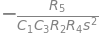

In [95]:
Z_sym = U_sym[v1]/(U_sym[I_V1])
Z_sym #.simplify()

The frequency dependent negative resistor can be used to convert ladder filters into active filters as desribed below.

## Generalized Impedance Converter Filter {#sec-GIC-LP-filter}
![GIC-LP-filter](GIC-LP-filter.png){#fig-GIC-LP-filter}  

The filter shown above is from @Williams1995, Figure 3-33. The filter is an active low-pass filter with a 3 dB cut off at 400 Hz, with at least 20 dB attenuation at 1200 Hz. Resistors Ra and Rb are included in the schematic to provide a DC path to ground since real Op Amps have some leakage current from the input terminals and this would cause a build up voltage on C2 if not for a DC ground path provided by Ra or Rb. Refere to @Williams1995 for a more detailed description of the filter design procedure.

The net list for the filter was obtained from LTSpice.
```
XU2 6 4 7 opamp Aol=100K GBW=10Meg
V1 1 0 AC 1
XU1 6 8 5 opamp Aol=100K GBW=10Meg
C1 3 1 0.01µ
C2 5 4 0.01µ
C3 7 6 0.01µ
C4 0 2 0.01µ
R2 5 6 40.2k
R3 7 8 41.2k
R4 8 0 40.2k
R1 4 3 22.1k
R5 2 4 97.6k
Rb 2 0 1Meg
```

The netlist was editied to fix Op Amp designators and to comment out Rb, which not needed for a symbolic solution. 

In [96]:
net_list = '''
O2 6 4 7
V1 1 0 1
O1 6 8 5
C1 3 1 0.01e-6
C2 5 4 0.01e-6
C3 7 6 0.01e-6
C4 0 2 0.01e-6
R2 5 6 40.2e3
R3 7 8 41.2e3
R4 8 0 40.2e3
R1 4 3 22.1e3
R5 2 4 97.6e3
*Rb 2 0 1e6
'''

Generate markdown text to display the network equations.

In [97]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{3} + I_{V1} = 0$<br>$v_{2} \left(C_{4} s + \frac{1}{R_{5}}\right) - \frac{v_{4}}{R_{5}} = 0$<br>$- C_{1} s v_{1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{5}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{5}} - \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{4} + I_{O1} + v_{5} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{2}} = 0$<br>$- C_{3} s v_{7} + v_{6} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$<br>$- C_{3} s v_{6} + I_{O2} + v_{7} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{8}}{R_{3}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{7}}{R_{3}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{6} = 0$<br>$v_{6} - v_{8} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [98]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solving for the transfer function at node 2.

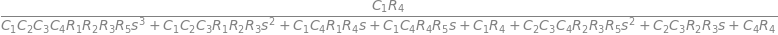

In [99]:
U_sym = solve(NE_sym,X)

H_sym = U_sym[v2]/U_sym[v1]
H_sym

The roots of the denominator can be obtained symbolically. Since the degree of the polynominal is a third order, SymPy can solve for the roots and obtain a solution very quickly. The roots expressed in symbolic form are not very useful, but are easily obtained, something that would be almost impossible to do by hand with pencil and paper.

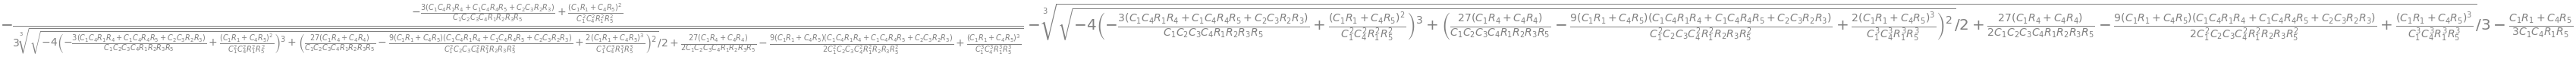

In [100]:
num, den = fraction(H_sym)
p = solve(den,s)
p[0]

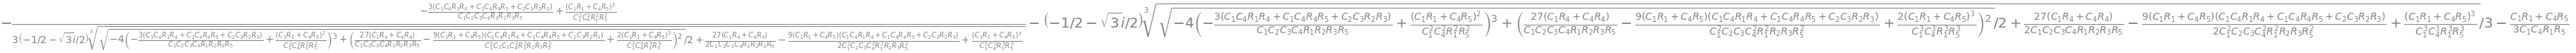

In [101]:
p[1]

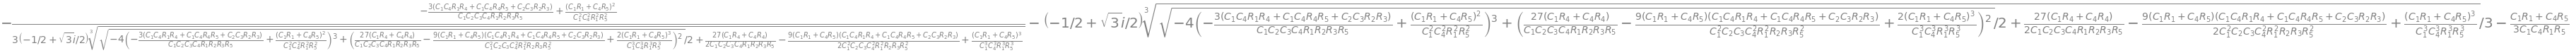

In [102]:
p[2]

Including Rb in the circuit and changing the value to 1M.

In [103]:
net_list = '''
O2 6 4 7
V1 1 0 1
O1 6 8 5
C1 3 1 0.01e-6
C2 5 4 0.01e-6
C3 7 6 0.01e-6
C4 0 2 0.01e-6
R2 5 6 40.2e3
R3 7 8 41.2e3
R4 8 0 40.2e3
R1 4 3 22.1e3
R5 2 4 97.6e3
Rb 2 0 1e6
'''

In [104]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{3} + I_{V1} = 0$<br>$v_{2} \left(C_{4} s + \frac{1}{Rb} + \frac{1}{R_{5}}\right) - \frac{v_{4}}{R_{5}} = 0$<br>$- C_{1} s v_{1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{5}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{5}} - \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{4} + I_{O1} + v_{5} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{2}} = 0$<br>$- C_{3} s v_{7} + v_{6} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$<br>$- C_{3} s v_{6} + I_{O2} + v_{7} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{8}}{R_{3}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{7}}{R_{3}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{6} = 0$<br>$v_{6} - v_{8} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [105]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [106]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1e-08, C₂: 1e-08, C₃: 1e-08, C₄: 1e-08, O₁: nan, O₂: nan, R₁: 22100.0, R₂
: 40200.0, R₃: 41200.0, R₄: 40200.0, R₅: 97600.0, Rb: 1000000.0, V₁: 1.0}

In [107]:
NE = NE_sym.subs(element_values)
NE

⎡                                  I_V1 + 1.0e-8⋅s⋅v₁ - 1.0e-8⋅s⋅v₃           
⎢                                                                             
⎢                    v₂⋅(1.0e-8⋅s + 1.12459016393443e-5) - 1.02459016393443e-5
⎢                                                                             
⎢            -1.0e-8⋅s⋅v₁ + v₃⋅(1.0e-8⋅s + 4.52488687782805e-5) - 4.5248868778
⎢                                                                             
⎢-1.0e-8⋅s⋅v₅ - 1.02459016393443e-5⋅v₂ - 4.52488687782805e-5⋅v₃ + v₄⋅(1.0e-8⋅s
⎢                                                                             
⎢         I_O1 - 1.0e-8⋅s⋅v₄ + v₅⋅(1.0e-8⋅s + 2.48756218905473e-5) - 2.4875621
⎢                                                                             
⎢            -1.0e-8⋅s⋅v₇ - 2.48756218905473e-5⋅v₅ + v₆⋅(1.0e-8⋅s + 2.48756218
⎢                                                                             
⎢         I_O2 - 1.0e-8⋅s⋅v₆ + v₇⋅(1.0e-8⋅s + 2.4271

In [108]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{2.79920457659434 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{3} = \frac{2.48756218905472 \cdot 10^{46} s^{4} + 2.79748796998614 \cdot 10^{49} s^{3} + 3.35064787818341 \cdot 10^{53} s^{2} + 3.13426936441268 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{4} = \frac{2.73202366675606 \cdot 10^{53} s^{2} + 3.07240694326994 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{5} = \frac{- 1.12559375070349 \cdot 10^{50} s^{3} + 1.46619200612885 \cdot 10^{53} s^{2} + 3.07240694326994 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{6} = \frac{2.73202366675606 \cdot 10^{53} s^{2} + 3.07240694326994 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{7} = \frac{5.53200812124237 \cdot 10^{53} s^{2} + 6.22124191995455 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{8} = \frac{2.73202366675606 \cdot 10^{53} s^{2} + 3.07240694326994 \cdot 10^{56} s}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$I_{V1} = \frac{- 1.12559375070349 \cdot 10^{50} s^{4} - 1.26583166062721 \cdot 10^{53} s^{3} - 2.79920457659434 \cdot 10^{56} s^{2} - 2.79920457659434 \cdot 10^{58} s}{2.48756218905472 \cdot 10^{54} s^{4} + 1.40534254770211 \cdot 10^{58} s^{3} + 4.61647953881062 \cdot 10^{61} s^{2} + 5.93347394100702 \cdot 10^{64} s + 2.79920457659434 \cdot 10^{66}}$<br>$I_{O2} = \frac{- 2.18748785506742 \cdot 10^{62} s^{3} - 7.76946386696064 \cdot 10^{65} s^{2} - 5.97094011052149 \cdot 10^{68} s}{1.943407960199 \cdot 10^{63} s^{4} + 1.09792386539227 \cdot 10^{67} s^{3} + 3.6066246396958 \cdot 10^{70} s^{2} + 4.63552651641173 \cdot 10^{73} s + 2.18687857546433 \cdot 10^{75}}$<br>$I_{O1} = \frac{1.75874023547421 \cdot 10^{48} s^{4} + 6.35283767986486 \cdot 10^{51} s^{3} + 4.9200546510697 \cdot 10^{54} s^{2}}{3.886815920398 \cdot 10^{52} s^{4} + 2.19584773078454 \cdot 10^{56} s^{3} + 7.2132492793916 \cdot 10^{59} s^{2} + 9.27105303282346 \cdot 10^{62} s + 4.37375715092865 \cdot 10^{64}}$<br>

In [109]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [110]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [111]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easly be obtained with the following code:

In [112]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the preamp transfer function are plotted.

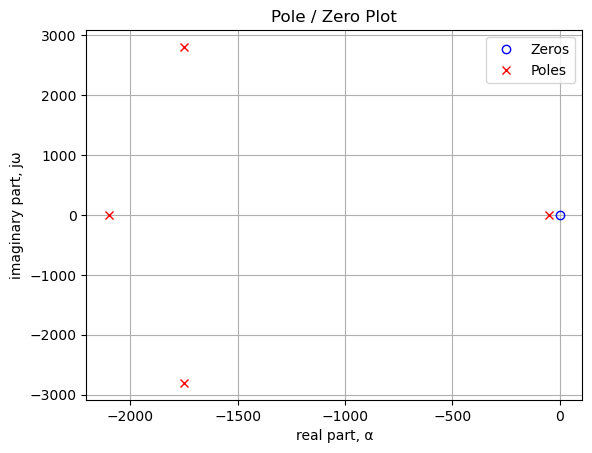

In [113]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [114]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [115]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-278.58+446.47j Hz
-278.58-446.47j Hz
-334.18+0.00j Hz
-7.80+0.00j Hz


The SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter.

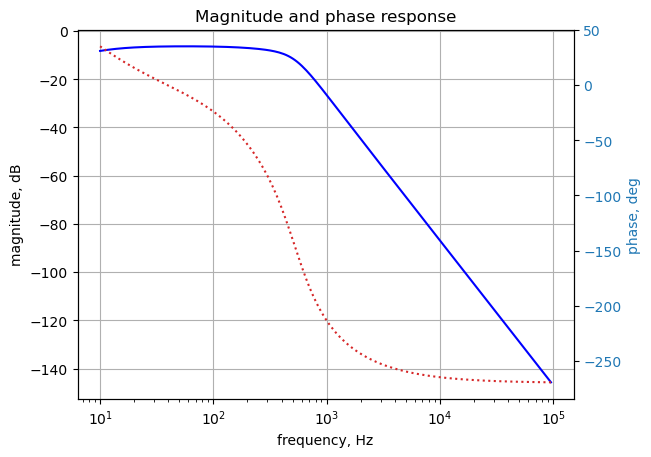

In [116]:
x = np.logspace(1, 5, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

The SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

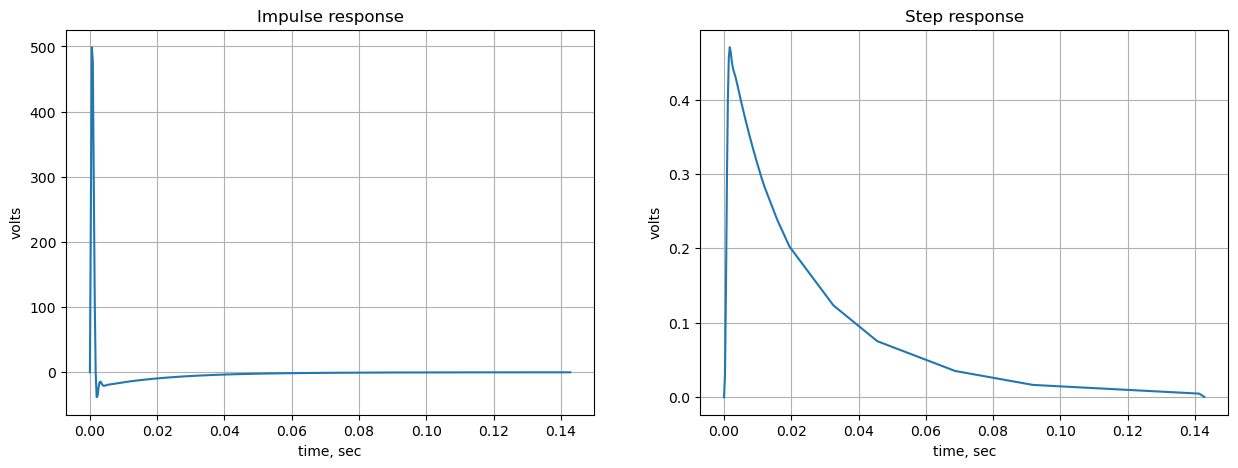

In [117]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()

# show plot
plt.show()

The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

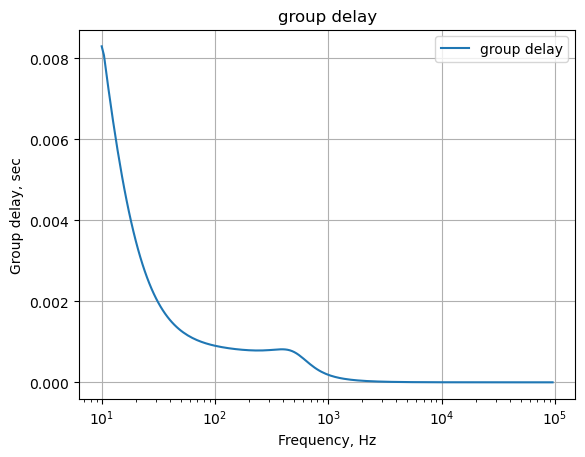

In [118]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

**Step response as a check of the network equations**

In [119]:
net_list = '''
O2 6 4 7
V1 1 0 1
O1 6 8 5
C1 3 1 0.01e-6
C2 5 4 0.01e-6
C3 7 6 0.01e-6
C4 0 2 0.01e-6
R2 5 6 40.2e3
R3 7 8 41.2e3
R4 8 0 40.2e3
R1 4 3 22.1e3
R5 2 4 97.6e3
Rb 2 0 1e6
'''

Generate the network equations.

In [120]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [121]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{3} + I_{V1} = 0$<br>$v_{2} \left(C_{4} s + \frac{1}{Rb} + \frac{1}{R_{5}}\right) - \frac{v_{4}}{R_{5}} = 0$<br>$- C_{1} s v_{1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{5}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{5}} - \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{4} + I_{O1} + v_{5} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{2}} = 0$<br>$- C_{3} s v_{7} + v_{6} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$<br>$- C_{3} s v_{6} + I_{O2} + v_{7} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{8}}{R_{3}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{7}}{R_{3}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{6} = 0$<br>$v_{6} - v_{8} = 0$<br>

get the element values from thge netlist.

In [122]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1e-08, C₂: 1e-08, C₃: 1e-08, C₄: 1e-08, O₁: nan, O₂: nan, R₁: 22100.0, R₂
: 40200.0, R₃: 41200.0, R₄: 40200.0, R₅: 97600.0, Rb: 1000000.0, V₁: 1.0}

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [123]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

The following cells analyize the circuit with a voltage ramp as the input. The Laplace transform of a ramp is $\frac {a}{s^2}$, where a is the slope of the ramp.

In [124]:
#element_values[V1] = 1/(s**2)   # ramp of 1 volt per 1 s
element_values[V1] = 1/(s)   # step function
NE = NE_sym.subs(element_values)
NE

                                                                              
⎡                                  I_V1 + 1.0e-8⋅s⋅v₁ - 1.0e-8⋅s⋅v₃           
⎢                                                                             
⎢                    v₂⋅(1.0e-8⋅s + 1.12459016393443e-5) - 1.02459016393443e-5
⎢                                                                             
⎢            -1.0e-8⋅s⋅v₁ + v₃⋅(1.0e-8⋅s + 4.52488687782805e-5) - 4.5248868778
⎢                                                                             
⎢-1.0e-8⋅s⋅v₅ - 1.02459016393443e-5⋅v₂ - 4.52488687782805e-5⋅v₃ + v₄⋅(1.0e-8⋅s
⎢                                                                             
⎢         I_O1 - 1.0e-8⋅s⋅v₄ + v₅⋅(1.0e-8⋅s + 2.48756218905473e-5) - 2.4875621
⎢                                                                             
⎢            -1.0e-8⋅s⋅v₇ - 2.48756218905473e-5⋅v₅ + v₆⋅(1.0e-8⋅s + 2.48756218
⎢                                                   

Solve the equations and display the results.

In [125]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{1}{s}$<br>$v_{2} = \frac{2.79920457659434 \cdot 10^{56}}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{3} = \frac{2.48756218905472 \cdot 10^{46} s^{3} + 2.79748796998614 \cdot 10^{49} s^{2} + 3.35064787818341 \cdot 10^{53} s + 3.13426936441268 \cdot 10^{56}}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{4} = \frac{2.73202366675606 \cdot 10^{53} s + 3.07240694326994 \cdot 10^{56}}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{5} = \frac{- 1.12559375070349 \cdot 10^{50} s^{2} + 1.46619200612885 \cdot 10^{53} s + 3.07240694326994 \cdot 10^{56}}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{6} = \frac{2.73202366675606 \cdot 10^{53} s + 3.07240694326994 \cdot 10^{56}}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{7} = \frac{5.53200812124237 \cdot 10^{53} s + 6.22124191995455 \cdot 10^{56}}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$v_{8} = \frac{2.73202366675606 \cdot 10^{53} s + 3.07240694326994 \cdot 10^{56}}{2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}}$<br>$I_{V1} = \frac{- 1.12559375070349 \cdot 10^{50} s^{3} - 1.26583166062721 \cdot 10^{53} s^{2} - 2.79920457659434 \cdot 10^{56} s - 2.79920457659434 \cdot 10^{58}}{2.48756218905472 \cdot 10^{54} s^{4} + 1.40534254770211 \cdot 10^{58} s^{3} + 4.61647953881062 \cdot 10^{61} s^{2} + 5.93347394100702 \cdot 10^{64} s + 2.79920457659434 \cdot 10^{66}}$<br>$I_{O2} = \frac{- 2.18748785506742 \cdot 10^{62} s^{2} - 7.76946386696064 \cdot 10^{65} s - 5.97094011052149 \cdot 10^{68}}{1.943407960199 \cdot 10^{63} s^{4} + 1.09792386539227 \cdot 10^{67} s^{3} + 3.6066246396958 \cdot 10^{70} s^{2} + 4.63552651641173 \cdot 10^{73} s + 2.18687857546433 \cdot 10^{75}}$<br>$I_{O1} = \frac{1.75874023547421 \cdot 10^{48} s^{3} + 6.35283767986486 \cdot 10^{51} s^{2} + 4.9200546510697 \cdot 10^{54} s}{3.886815920398 \cdot 10^{52} s^{4} + 2.19584773078454 \cdot 10^{56} s^{3} + 7.2132492793916 \cdot 10^{59} s^{2} + 9.27105303282346 \cdot 10^{62} s + 4.37375715092865 \cdot 10^{64}}$<br>

Declare the variable t for time.

In [126]:
t = symbols('t',positive=True)  # t > 0

The voltage at node 1 is a ramp and the inverse Laplace transform of the ramp is calculated below.

In [127]:
V1_volts = inverse_laplace_transform(U[v1], s, t)
V1_volts

The voltage at node 2 is:

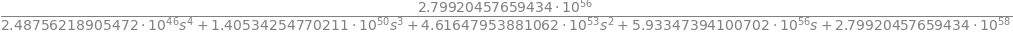

In [128]:
node_v2_s = U[v2] #.nsimplify().simplify().expand().together()
node_v2_s

The inverse Laplace was taking too long, so the lines of code were commented out

In [129]:
#node_v2 = inverse_laplace_transform(node_v2_s, s, t)
#node_v2

Using NumPy to obtain the partial fraction expansion, convert back to the s domain and then take the inverse Laplace transform on each term.

In [130]:
n, d = fraction(node_v2_s)
n = n.expand()
d = d.expand()
Markdown('numerator: ${:s}$<br>denominator: ${:s}$'.format(latex(n),latex(d)))

numerator: $2.79920457659434 \cdot 10^{56}$<br>denominator: $2.48756218905472 \cdot 10^{46} s^{4} + 1.40534254770211 \cdot 10^{50} s^{3} + 4.61647953881062 \cdot 10^{53} s^{2} + 5.93347394100702 \cdot 10^{56} s + 2.79920457659434 \cdot 10^{58}$

Use the SciPy residue function to do the inverse Laplace transform.

In [131]:
cn = Poly(n, s).all_coeffs()
cd = Poly(d, s).all_coeffs()
r, p, k = signal.residue(cn, cd, tol=0.001, rtype='avg')

# build a symbolic expression for each of the residues and find the inverse Laplace of each one and save
z = 0
for i in range(len(r)):
    m = (r[i]/(s-p[i]))
    z += inverse_laplace_transform(m, s, t)

Each of the terms came be converted to a function using SymPy's [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html) function. Define the values for the x-axis of the plot and put each one into an array for plotting.

In [132]:
# the x-axis is time and voltages are plotted from 0 to 0.001 seconds over 200 points 
x = np.linspace(0, 0.2, 200, endpoint=True)

# the voltage at note 2 is evaluated at each point in the array x
V_node2 = lambdify(t, z)(x)

# the voltage at note 1 is evaluated at each point in the array x
V_node1 = lambdify(t, V1_volts)(x)

Plot the final combined result.

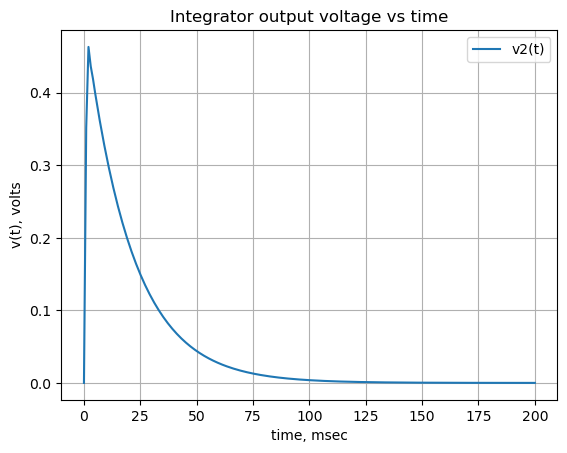

In [133]:
plt.title('Integrator output voltage vs time')

plt.plot(x*1e3, np.real(V_node2),label='v2(t)')
#plt.plot(x, np.real(V_node1),label='v1(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, msec')

plt.legend()
plt.grid()
plt.show()

## Dual amplifier band pass filter
![Dual amplifier band pass filter with compoenet values set to 1](DABP.png){#fig-DABP}  

The Dual Amplifier Bandpass (DABP) filter shown above is from @Williams1995, Figure 5-27. The filter was first described by @Sedra1975. The filter uses two Op Amps and has eight branches and 6 nodes. The DABP configuration has been found very useful for designs covering a wide range of Qs and frequencies. Component sensitivity is small, resonant frequency and Q are easily adjustable, and the element spread is low. 

The schematic was entered into LTSpice and the netlist was exported as shown below.

```
XU1 5 4 2 opamp Aol=100K GBW=10Meg
XU2 5 6 3 opamp Aol=100K GBW=10Meg
R1 4 1 10
R2 4 3 1
R3 5 2 1
R5 6 2 1
R4 6 0 1
C2 5 3 1
C1 0 4 1
V1 1 0 AC 1
```

The netlist was modified and equated to the net list variable shown below.

In [134]:
net_list = '''
O1 5 4 2
O2 5 6 3
R1 4 1 1
R2 4 3 1
R3 5 2 1
R5 6 2 1
R4 6 0 1
C2 5 3 1
C1 0 4 1
V1 1 0 1
'''

Generate and display the network equations.

In [135]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{4}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{5}} - \frac{v_{5}}{R_{3}} = 0$<br>$- C_{2} s v_{5} + I_{O2} + v_{3} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{2}} = 0$<br>$v_{4} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$- C_{2} s v_{3} + v_{5} \left(C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{2}}{R_{3}} = 0$<br>$v_{6} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{2}}{R_{5}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{5} = 0$<br>$v_{5} - v_{6} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [136]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the network equations for the unknown node voltages and currents.

In [137]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s + C_{2} R_{2} R_{3} R_{5} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{3} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s - R_{2} R_{5} V_{1}}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{4} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{5} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{6} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$I_{V1} = \frac{- C_{1} C_{2} R_{2} R_{3} R_{4} V_{1} s^{2} - R_{5} V_{1}}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$I_{O1} = \frac{- C_{2} R_{2} R_{3} V_{1} s - C_{2} R_{2} R_{5} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$I_{O2} = \frac{C_{2} R_{2} R_{5} V_{1} s + R_{5} V_{1}}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>

Solving for the transfer function at node 2.

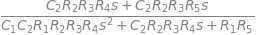

In [138]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.cancel()

Using the function fraction() extract the numerator and denomiator of the transferfunction.

In [139]:
num, den = fraction(H_sym.cancel())

The denominator is a second order function of the Laplace variable s shown below.

In [140]:
den

The following code extracts the coefficients of s and these are assigned to variables, a, b and c.

In [141]:
p = Poly(den, s)
a, b, c, = p.coeffs()

Omega, $\omega$, is the natural freguency of system and is determined by the following expression: 

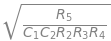

In [142]:
omega = sqrt(c/a)
omega

Q is a parameter that relates the damping ratio to the natural frequency. 

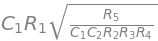

In [143]:
Q = omega/(b/a)
Q

The design of a band pass filter can be accomplished by letting $C1 = C2 = Cn = 0.1\mu$F, $R4 = R5 = Rp = 10$k and $R2 = R3 = R$. We can then solve for R at the desired $\omega$ and $\zeta$. For example, if we desire a band pass filter with a center frequency of 10 Hz, $\omega = 2 \pi 10$ and a damping ratio of $\zeta = 0.5$, we can solve for the value of R that gives an $\omega = 2 \pi 10$ 

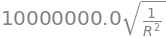

In [144]:
R = Symbol('R')
freq = 10 #Hz
Cn = 0.1e-6
Rp = 10e3
omega_n = omega.subs({R2:R,R3:R,C1:Cn,C2:Cn,R5:Rp,R4:Rp})
omega_n

Solve for R with $\omega = 10$Hz.

In [145]:
Rn = solve(omega_n-freq*2*pi,R)
Rn = float(Rn[1])
Rn

Solve for R with $R2=R3=Rn$,

In [146]:
Q_n = Q.subs({R2:Rn,R3:Rn,C1:Cn,C2:Cn,R5:Rp,R4:Rp})
Q_n

The damping ratio is a system parameter, denoted by $\zeta$

- underdamped: $\zeta \gt 1$, roots of the demoninator are real
- critically damped: $\zeta = 1$
- overdamped: $\zeta \lt 1$, roots of the demoninator are complex 

Q factor is another non-dimensional characterization of the amount of damping; high Q indicates slow damping relative to the oscillation.

$Q = \frac {1}{2 \zeta}$

In [147]:
zeta = 0.5
q_factor = 1/(2*zeta)
R1n = solve(Q_n - q_factor,R1)
R1n = float(R1n[0])
R1n

Using the component values calculated above, these are substituted into the network equations. 

In [148]:
NE = NE_sym.subs({V1:1.0, R1:R1n, R2:Rn, R3:Rn, R5:Rp, R4:Rp, C2:Cn, C1:Cn})

The equations are quickly solved by SymPy and the solution is displayed.

In [149]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{1.25663706143592 \cdot 10^{28} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{3} = \frac{6.28318530717959 \cdot 10^{27} s - 3.94784176043575 \cdot 10^{29}}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{4} = \frac{6.28318530717959 \cdot 10^{27} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{5} = \frac{6.28318530717959 \cdot 10^{27} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{6} = \frac{6.28318530717959 \cdot 10^{27} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$I_{V1} = \frac{- 6.28318530717959 \cdot 10^{40} s^{2} - 1.25663706143592 \cdot 10^{28} s - 2.48050213442399 \cdot 10^{44}}{1.0 \cdot 10^{46} s^{2} + 6.28318530717961 \cdot 10^{47} s + 3.94784176043575 \cdot 10^{49}}$<br>$I_{O1} = - \frac{6.67796948322322 \cdot 10^{30} s}{1.0 \cdot 10^{33} s^{2} + 6.28318530717961 \cdot 10^{34} s + 3.94784176043575 \cdot 10^{36}}$<br>$I_{O2} = \frac{3.94784176043575 \cdot 10^{42} s + 2.48050213442399 \cdot 10^{44}}{1.0 \cdot 10^{46} s^{2} + 6.28318530717961 \cdot 10^{47} s + 3.94784176043575 \cdot 10^{49}}$<br>

The transfer function is v2/v1 and some simplication is performed by the operations of nsimplify().simplify().expand().together().

In [150]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [151]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [152]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

In [153]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the preamp transfer function are plotted.

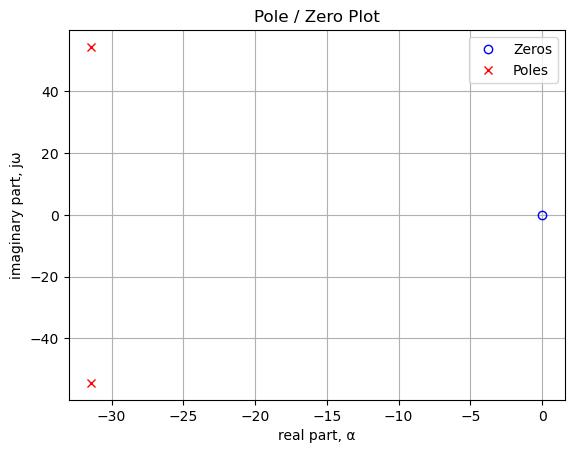

In [154]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values units in Hz.

In [155]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [156]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 2
-5.00+8.66j Hz
-5.00-8.66j Hz


The SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter.

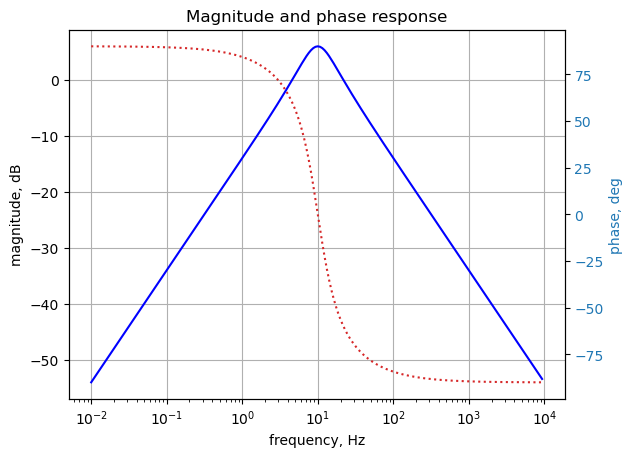

In [157]:
x = np.logspace(-2, 4, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

The SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

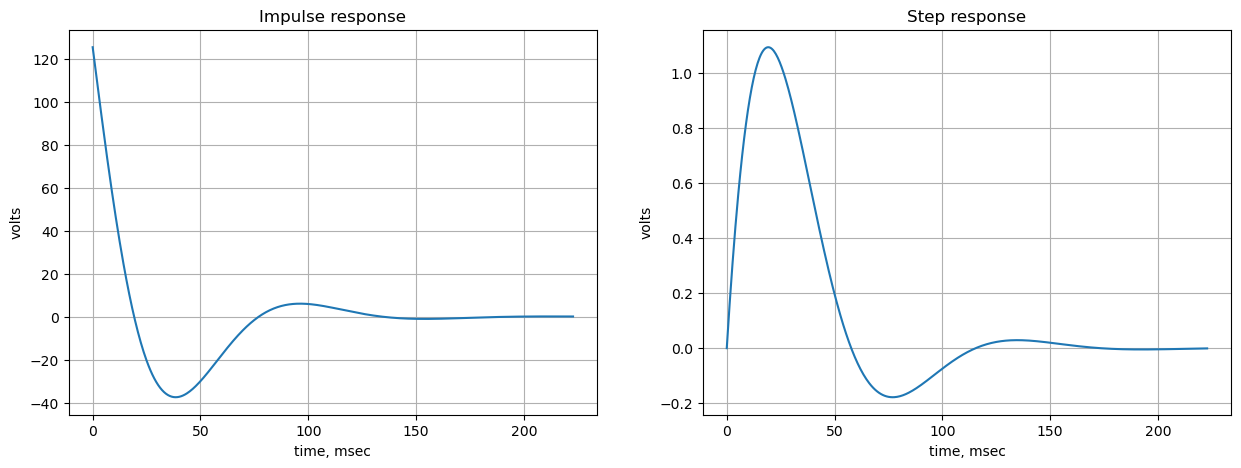

In [158]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

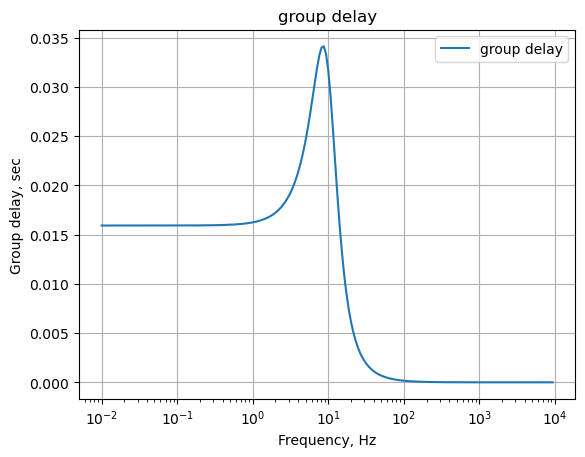

In [159]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

**Step response as a check of the network equations**

In [160]:
net_list = '''
O1 5 4 2
O2 5 6 3
R1 4 1 1
R2 4 3 1
R3 5 2 1
R5 6 2 1
R4 6 0 1
C2 5 3 1
C1 0 4 1
V1 1 0 1
'''

Generate the network equations.

In [161]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [162]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{4}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{5}} - \frac{v_{5}}{R_{3}} = 0$<br>$- C_{2} s v_{5} + I_{O2} + v_{3} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{2}} = 0$<br>$v_{4} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$- C_{2} s v_{3} + v_{5} \left(C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{2}}{R_{3}} = 0$<br>$v_{6} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{2}}{R_{5}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{5} = 0$<br>$v_{5} - v_{6} = 0$<br>

get the element values from thge netlist.

In [163]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1.0, C₂: 1.0, O₁: nan, O₂: nan, R₁: 1.0, R₂: 1.0, R₃: 1.0, R₄: 1.0, R₅: 1
.0, V₁: 1.0}

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [164]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

The following cells analyize the circuit with a voltage ramp as the input. The Laplace transform of a ramp is $\frac {a}{s^2}$, where a is the slope of the ramp.

In [165]:
#element_values[V1] = 1/(s**2)   # ramp of 1 volt per 1 s
#element_values[V1] = 1/(s)   # step function
NE = NE_sym.subs({V1:1/(s), R1:R1n, R2:Rn, R3:Rn, R5:Rp, R4:Rp, C2:Cn, C1:Cn})
NE

                                                                              
⎡                I_V1 + 6.28318530717959e-6⋅v₁ - 6.28318530717959e-6⋅v₄       
⎢                                                                             
⎢          I_O1 + 0.00010628318530718⋅v₂ - 6.28318530717959e-6⋅v₅ - 0.0001⋅v₆ 
⎢                                                                             
⎢  I_O2 - 1.0e-7⋅s⋅v₅ + v₃⋅(1.0e-7⋅s + 6.28318530717959e-6) - 6.28318530717959
⎢                                                                             
⎢-6.28318530717959e-6⋅v₁ - 6.28318530717959e-6⋅v₃ + v₄⋅(1.0e-7⋅s + 1.256637061
⎢                                                                             
⎢     -1.0e-7⋅s⋅v₃ - 6.28318530717959e-6⋅v₂ + v₅⋅(1.0e-7⋅s + 6.28318530717959e
⎢                                                                             
⎢                                -0.0001⋅v₂ + 0.0002⋅v₆                       
⎢                                                   

Solve the equations and display the results.

In [166]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{1}{s}$<br>$v_{2} = \frac{1.25663706143592 \cdot 10^{28}}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{3} = \frac{6.28318530717959 \cdot 10^{27} s - 3.94784176043575 \cdot 10^{29}}{1.0 \cdot 10^{26} s^{3} + 6.28318530717961 \cdot 10^{27} s^{2} + 3.94784176043575 \cdot 10^{29} s}$<br>$v_{4} = \frac{6.28318530717959 \cdot 10^{27}}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{5} = \frac{6.28318530717959 \cdot 10^{27}}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{6} = \frac{6.28318530717959 \cdot 10^{27}}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$I_{V1} = \frac{- 6.28318530717959 \cdot 10^{40} s^{2} - 1.25663706143592 \cdot 10^{28} s - 2.48050213442399 \cdot 10^{44}}{1.0 \cdot 10^{46} s^{3} + 6.28318530717961 \cdot 10^{47} s^{2} + 3.94784176043575 \cdot 10^{49} s}$<br>$I_{O1} = - \frac{6.67796948322322 \cdot 10^{30}}{1.0 \cdot 10^{33} s^{2} + 6.28318530717961 \cdot 10^{34} s + 3.94784176043575 \cdot 10^{36}}$<br>$I_{O2} = \frac{3.94784176043575 \cdot 10^{42} s + 2.48050213442399 \cdot 10^{44}}{1.0 \cdot 10^{46} s^{3} + 6.28318530717961 \cdot 10^{47} s^{2} + 3.94784176043575 \cdot 10^{49} s}$<br>

Declare the variable t for time.

In [167]:
t = symbols('t',positive=True)  # t > 0

The voltage at node 1 is a ramp and the inverse Laplace transform of the ramp is calculated below.

In [168]:
V1_volts = inverse_laplace_transform(U[v1], s, t)
V1_volts

The voltage at node 2 is:

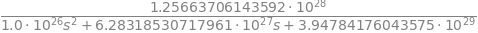

In [169]:
node_v2_s = U[v2] #.nsimplify().simplify().expand().together()
node_v2_s

The inverse Laplace was taking too long, so the lines of code were commented out

In [170]:
#node_v2 = inverse_laplace_transform(node_v2_s, s, t)
#node_v2

Using NumPy to obtain the partial fraction expansion, convert back to the s domain and then take the inverse Laplace transform on each term.

In [171]:
n, d = fraction(node_v2_s)
n = n.expand()
d = d.expand()
Markdown('numerator: ${:s}$<br>denominator: ${:s}$'.format(latex(n),latex(d)))

numerator: $1.25663706143592 \cdot 10^{28}$<br>denominator: $1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}$

Use the SciPy residue function to do the inverse Laplace transform.

In [172]:
cn = Poly(n, s).all_coeffs()
cd = Poly(d, s).all_coeffs()
r, p, k = signal.residue(cn, cd, tol=0.001, rtype='avg')

# build a symbolic expression for each of the residues and find the inverse Laplace of each one and save
z = 0
for i in range(len(r)):
    m = (r[i]/(s-p[i]))
    z += inverse_laplace_transform(m, s, t)

Each of the terms came be converted to a function using SymPy's [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html) function. Define the values for the x-axis of the plot and put each one into an array for plotting.

In [173]:
# the x-axis is time and voltages are plotted from 0 to 0.001 seconds over 200 points 
x = np.linspace(0, 0.2, 200, endpoint=True)

# the voltage at note 2 is evaluated at each point in the array x
V_node2 = lambdify(t, z)(x)

# the voltage at note 1 is evaluated at each point in the array x
V_node1 = lambdify(t, V1_volts)(x)

Plot the final combined result.

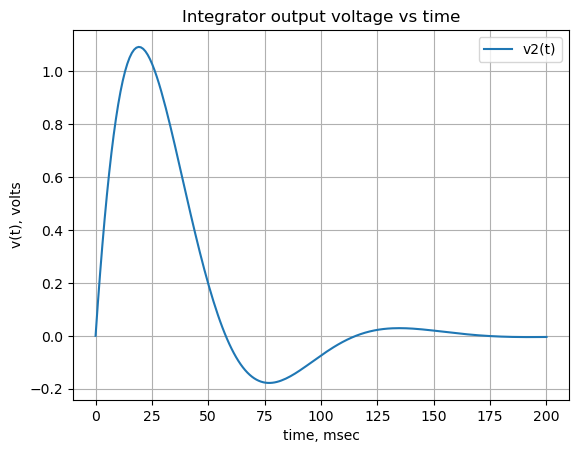

In [174]:
plt.title('Integrator output voltage vs time')

plt.plot(x*1e3, np.real(V_node2),label='v2(t)')
#plt.plot(x, np.real(V_node1),label='v1(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, msec')

plt.legend()
plt.grid()
plt.show()

## Summary


$\large{\color {red} {\text{comment}}}$  